# Importing Libraries

In [1]:
import requests
import math
import lxml.html as lh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Web Scraping

In [2]:
url="https://agmarknet.gov.in/SearchCmmMkt.aspx?Tx_Commodity=17&Tx_State=UP&Tx_District=1&Tx_Market=0&DateFrom=01-Jan-2020&DateTo=31-Dec-2020&Fr_Date=01-Jan-2020&To_Date=31-Dec-2020&Tx_Trend=0&Tx_CommodityHead=Apple&Tx_StateHead=Uttar+Pradesh&Tx_DistrictHead=Agra&Tx_MarketHead=--Select--"
page=requests.get(url)

# Step 1 : Get the HTML

In [3]:
html_content=page.content
print(html_content)

b'\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><title>\r\n\tAgriculture Marketing\r\n</title><link href="css/style.css" rel="stylesheet" type="text/css" />    \r\n    <script type="text/javascript" src="http://ajax.googleapis.com/ajax/libs/jquery/1.8.3/jquery.min.js"></script>\r\n     \r\n    <link href="css/stylehome.css" rel="stylesheet" type="text/css" /><link href="css/skin.css" rel="stylesheet" type="text/css" /><link rel="stylesheet" href="http://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css" /> \r\n    <script type="text/javascript" src="../Scripts/jquery.jcarousel.js"></script>\r\n\r\n    <script type="text/javascript">\r\n        $(document).ready(function () {\r\n            $("#ddlArrivalPrice").change(function () {\r\n                if ($("#ddlArrivalPrice").val() 

# Step 2 : Parse the HTML

In [4]:
soup=BeautifulSoup(html_content,'html.parser')
print(soup)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title>
	Agriculture Marketing
</title><link href="css/style.css" rel="stylesheet" type="text/css"/>
<script src="http://ajax.googleapis.com/ajax/libs/jquery/1.8.3/jquery.min.js" type="text/javascript"></script>
<link href="css/stylehome.css" rel="stylesheet" type="text/css"/><link href="css/skin.css" rel="stylesheet" type="text/css"/><link href="http://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css" rel="stylesheet"/>
<script src="../Scripts/jquery.jcarousel.js" type="text/javascript"></script>
<script type="text/javascript">
        $(document).ready(function () {
            $("#ddlArrivalPrice").change(function () {
                if ($("#ddlArrivalPrice").val() == "2")                    
                    $("#txtDateTo").attr("disable

In [5]:
tr_elements=soup.find_all('tr')
tr_elements[1].get_text()

'\n\r\n                                                1\r\n                                            \nAgra\n\nAgra\n\nApple\n\nDelicious\n\nMedium\n\n4750\n\n5050\n\n4900\n\n31 Dec 2020\n\n'

# Creating Pandas Dataframe

In [6]:
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [7]:
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"Sl no."
2:"District Name"
3:"Market Name"
4:"Commodity"
5:"Variety"
6:"Grade"
7:"Min Price (Rs./Quintal)"
8:"Max Price (Rs./Quintal)"
9:"Modal Price (Rs./Quintal)"
10:"Price Date"


In [8]:
def remove(string):
    return string.replace(" ", "")

In [9]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=10:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        temp=""
        for x in data :
            if(x!="\n" and x!="\r"):
                temp+=x;
            elif x==" ":
                continue
            else:
                temp+=" "
        data=remove(temp)
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [10]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [11]:
df.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Agra,Apple,Delicious,Medium,4750,5050,4900,31Dec2020
1,2,Agra,Agra,Apple,Delicious,Medium,4800,5100,4940,30Dec2020
2,3,Agra,Agra,Apple,Delicious,Medium,4850,5100,4950,29Dec2020
3,4,Agra,Agra,Apple,Delicious,Medium,4800,5100,4950,28Dec2020
4,5,Agra,Agra,Apple,Delicious,Medium,4750,5100,4900,26Dec2020


In [12]:
scraped=pd.DataFrame()
scraped=df
scraped.to_csv('scraped_data.csv')
scraped

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Agra,Apple,Delicious,Medium,4750,5050,4900,31Dec2020
1,2,Agra,Agra,Apple,Delicious,Medium,4800,5100,4940,30Dec2020
2,3,Agra,Agra,Apple,Delicious,Medium,4850,5100,4950,29Dec2020
3,4,Agra,Agra,Apple,Delicious,Medium,4800,5100,4950,28Dec2020
4,5,Agra,Agra,Apple,Delicious,Medium,4750,5100,4900,26Dec2020
5,6,Agra,Agra,Apple,Delicious,Medium,4800,5150,4980,25Dec2020
6,7,Agra,Agra,Apple,Delicious,Medium,4850,5100,4950,24Dec2020
7,8,Agra,Agra,Apple,Delicious,Medium,4800,5050,4920,23Dec2020
8,9,Agra,Agra,Apple,Delicious,Medium,4750,5200,4900,22Dec2020
9,10,Agra,Agra,Apple,Delicious,Medium,4800,5100,4950,21Dec2020


# Importing the dataset

In [13]:
df = pd.read_csv("agri_data_2020.csv")
ori_df=pd.DataFrame()
ori_df=df
df.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Achnera,Potato,Desi,FAQ,900,1000,950,30-Dec-20
1,2,Agra,Achnera,Potato,Desi,FAQ,800,900,850,29-Dec-20
2,3,Agra,Achnera,Potato,Desi,FAQ,850,950,900,28-Dec-20
3,4,Agra,Achnera,Potato,Desi,FAQ,800,900,850,27-Dec-20
4,5,Agra,Achnera,Potato,Desi,FAQ,800,900,850,26-Dec-20


# Plotting graphs to find Price Patterns

<AxesSubplot:xlabel='Modal Price (Rs./Quintal)', ylabel='Market Name'>

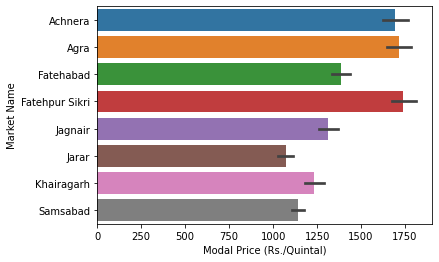

In [14]:
sns.barplot(x=df['Modal Price (Rs./Quintal)'],y=df['Market Name'])

<AxesSubplot:xlabel='Min Price (Rs./Quintal)', ylabel='Market Name'>

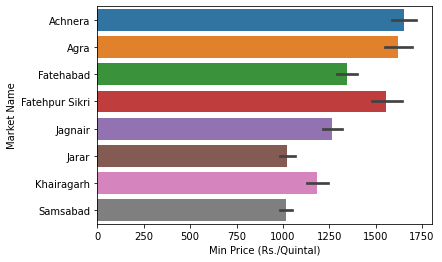

In [15]:
sns.barplot(x=df['Min Price (Rs./Quintal)'],y=df['Market Name'])

<AxesSubplot:xlabel='Max Price (Rs./Quintal)', ylabel='Market Name'>

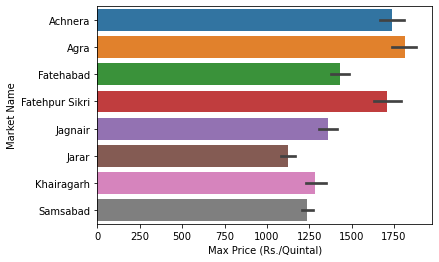

In [16]:
sns.barplot(x=df['Max Price (Rs./Quintal)'],y=df['Market Name'])

<AxesSubplot:xlabel='Modal Price (Rs./Quintal)', ylabel='Variety'>

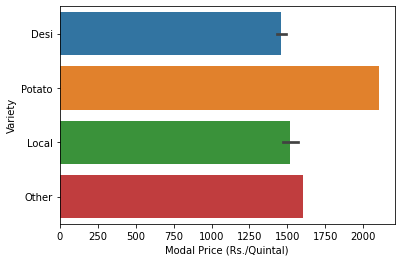

In [17]:
sns.barplot(x=df['Modal Price (Rs./Quintal)'],y=df['Variety'])

<AxesSubplot:xlabel='Min Price (Rs./Quintal)', ylabel='Variety'>

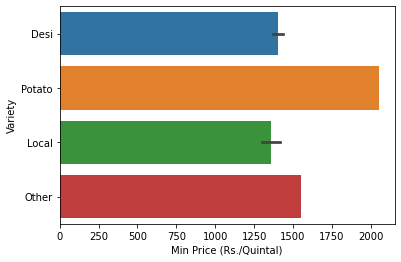

In [18]:
sns.barplot(x=df['Min Price (Rs./Quintal)'],y=df['Variety'])

<AxesSubplot:xlabel='Max Price (Rs./Quintal)', ylabel='Variety'>

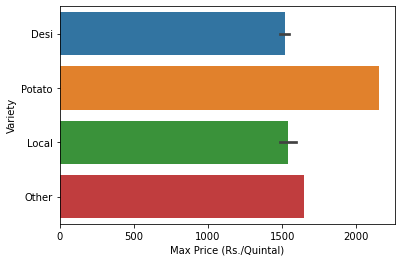

In [19]:
sns.barplot(x=df['Max Price (Rs./Quintal)'],y=df['Variety'])

# Model Price Vs Market 

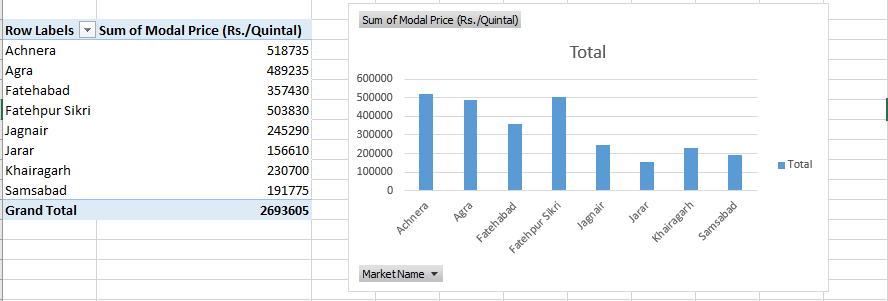

# Max Price Vs Market 

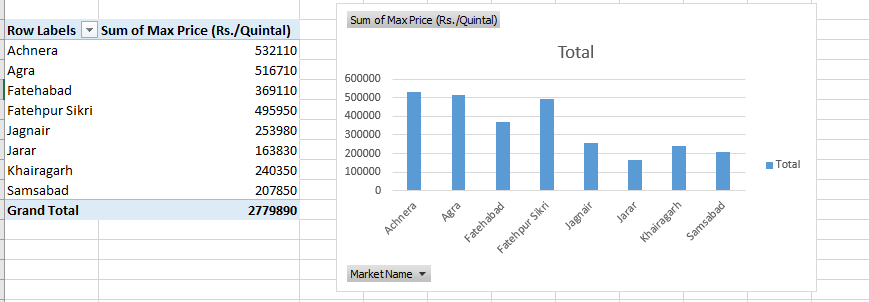

# Min Price Vs Market 

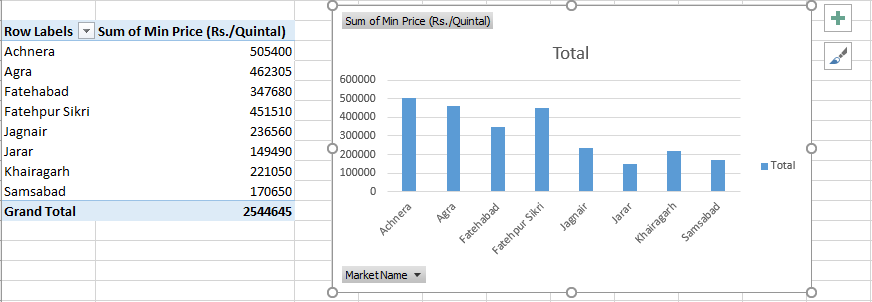

# Model Price Vs Date

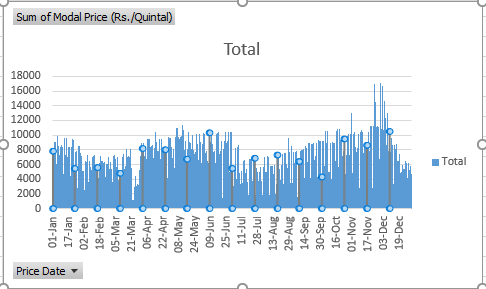

# Model Price Vs Variety

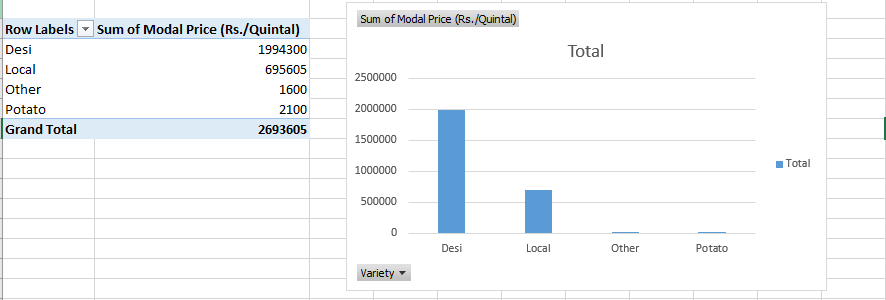

# Monthly Trend

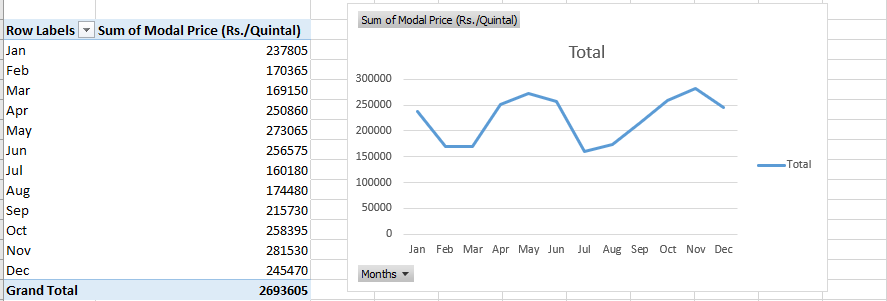

# Achnera Monthly Trend

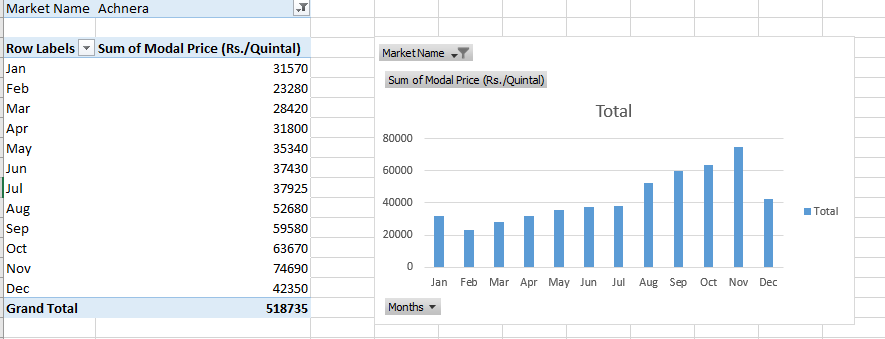

# Agra Monthly Trend

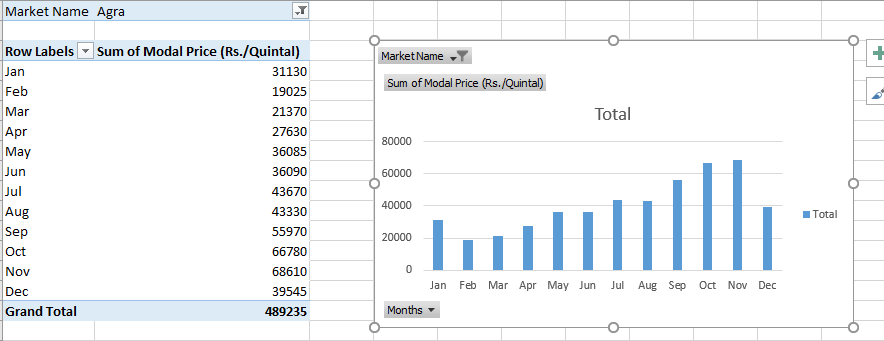

# Fatehbad Monthly Trend

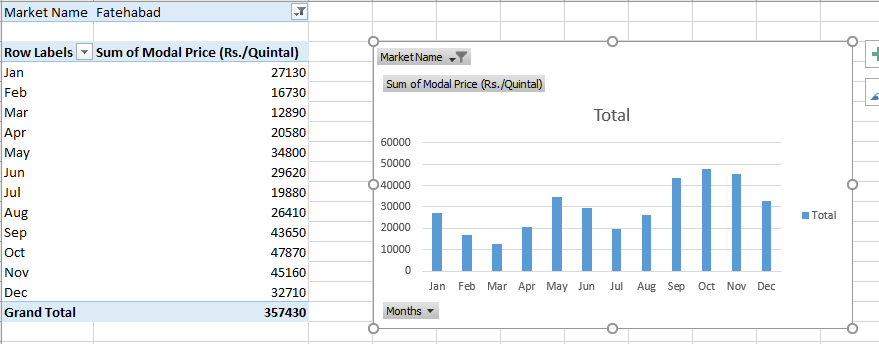

# Fatehpur Sikri Monthly Trend

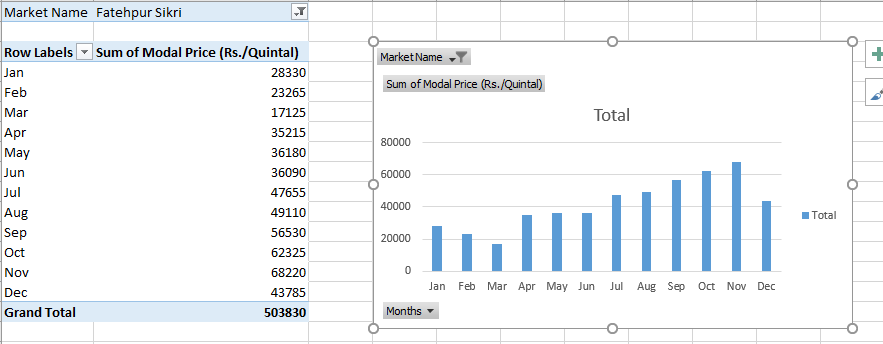

# Jagnair Monthly Trend

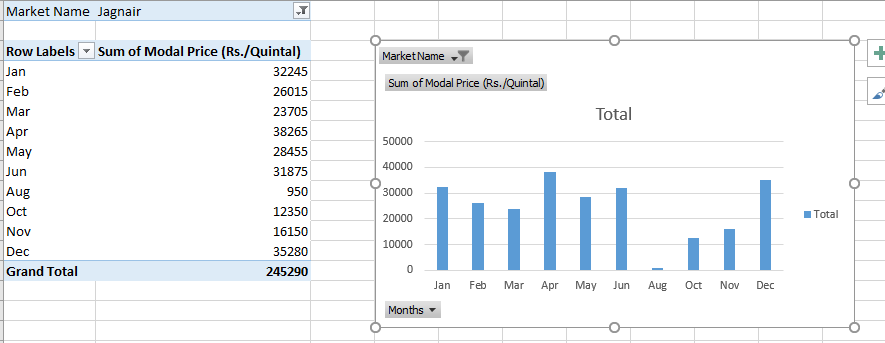

# Jarar Monthly Trend

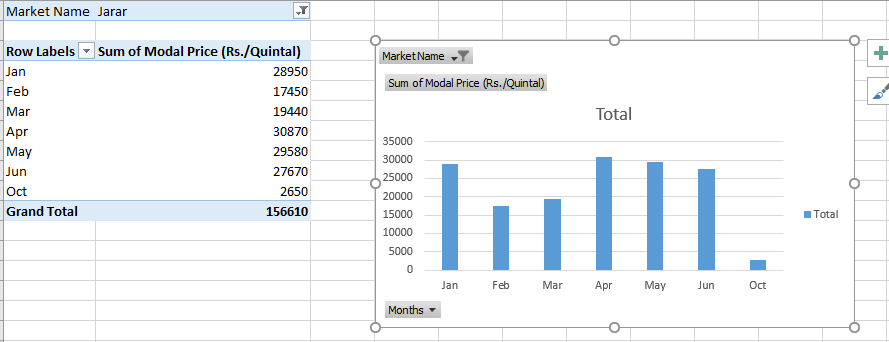

# Khairagarh Monthly Trend

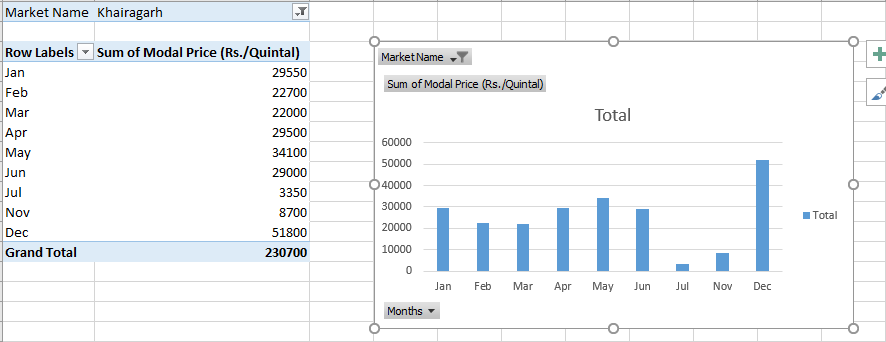

# Samsabad Monthly Trend

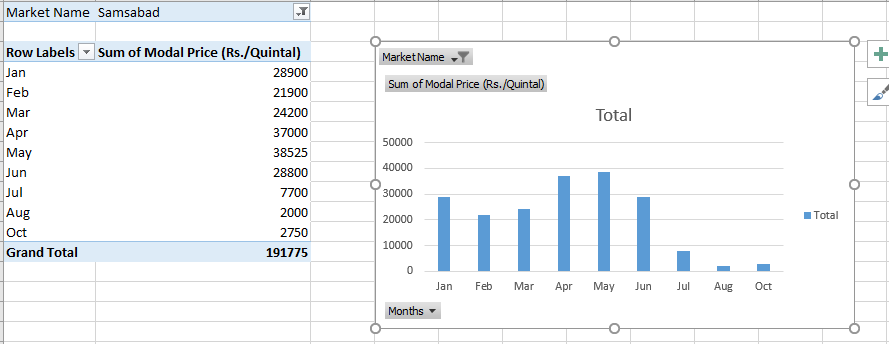

# Achnera Variety Trend

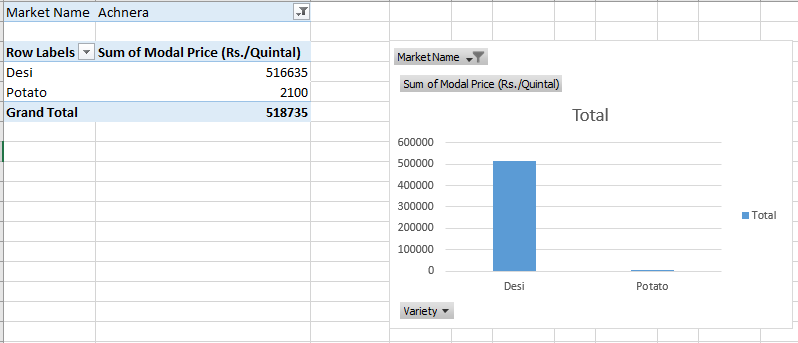

# Agra Variety Trend

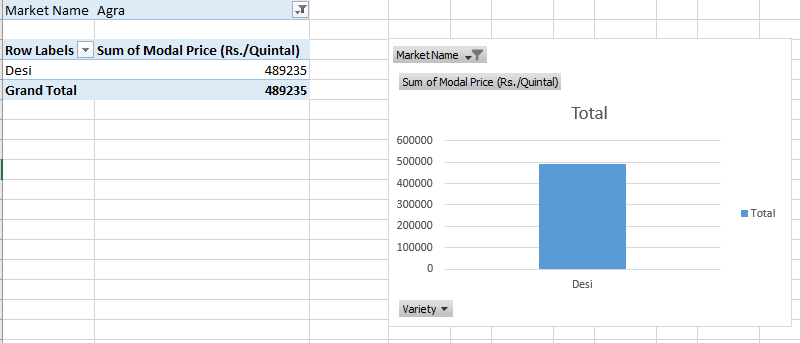

# Fatehbad Monthly Trend

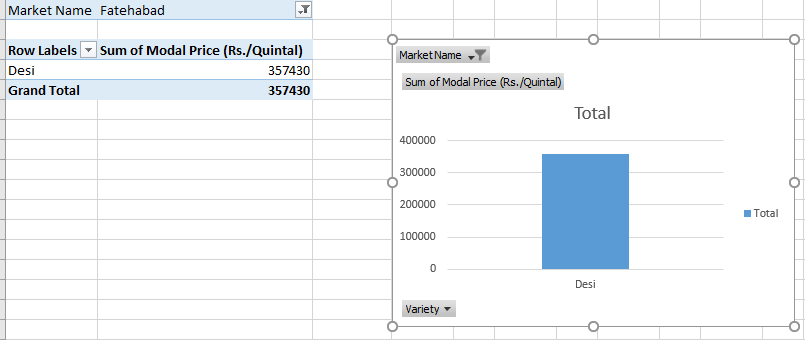

# Fatehpur Sikri Monthly Trend

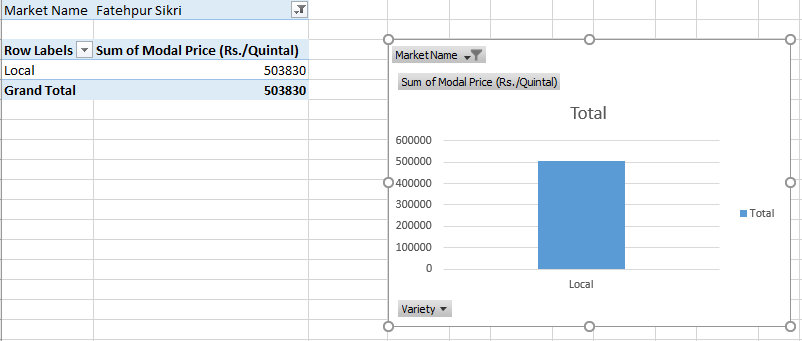

# Jagnair Monthly Trend

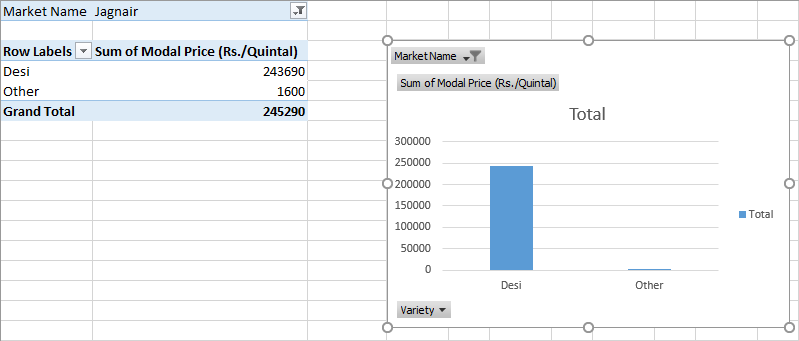

# Jarar Monthly Trend

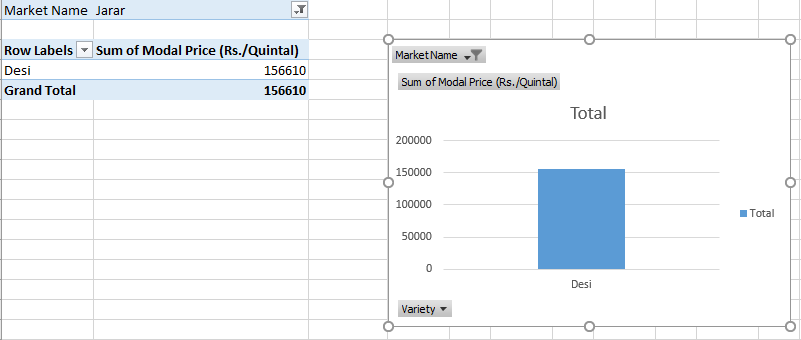

# Kairagarh Monthly Trend

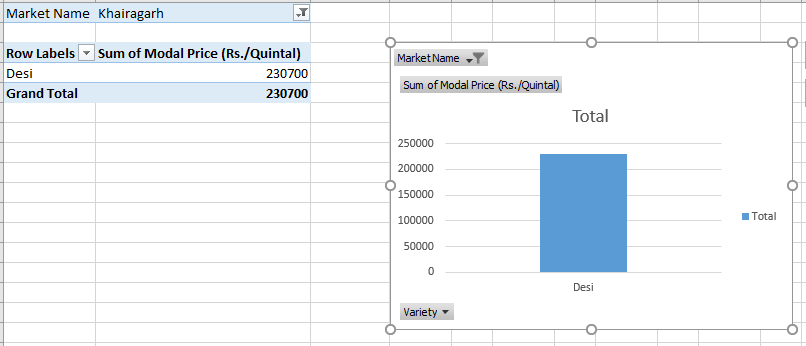

# Samsabad Monthly Trend

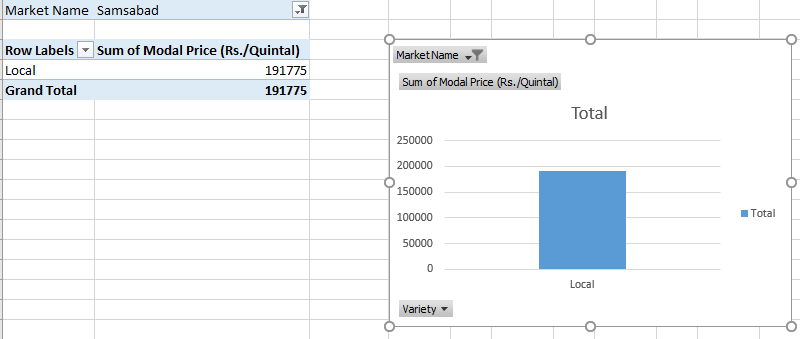

# Cleaning the data

In [20]:
del df['District Name']
del df['Grade']
del df['Commodity']
del df['Sl no.']
temp=df['Min Price (Rs./Quintal)']
del df['Min Price (Rs./Quintal)']
df['Min Price (Rs./Quintal)']=temp
temp=df['Max Price (Rs./Quintal)']
del df['Max Price (Rs./Quintal)']
df['Max Price (Rs./Quintal)']=temp
temp=df['Modal Price (Rs./Quintal)']
del df['Modal Price (Rs./Quintal)']
df['Modal Price (Rs./Quintal)']=temp

# Encoding categorical data

In [21]:
encoder = ce.BackwardDifferenceEncoder(cols=['Market Name','Variety','Price Date'])
df = encoder.fit_transform(df)

C:\Users\rohit\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [22]:
df

,intercept,Market Name_0,Market Name_1,Market Name_2,Market Name_3,Market Name_4,Market Name_5,Market Name_6,Variety_0,Variety_1,...,Price Date_357,Price Date_358,Price Date_359,Price Date_360,Price Date_361,Price Date_362,Price Date_363,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal)
0,1,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.75,-0.5,...,-0.019178,-0.016438,-0.013699,-0.010959,-0.008219,-0.005479,-0.00274,900,1000,950
1,1,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.75,-0.5,...,-0.019178,-0.016438,-0.013699,-0.010959,-0.008219,-0.005479,-0.00274,800,900,850
2,1,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.75,-0.5,...,-0.019178,-0.016438,-0.013699,-0.010959,-0.008219,-0.005479,-0.00274,850,950,900
3,1,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.75,-0.5,...,-0.019178,-0.016438,-0.013699,-0.010959,-0.008219,-0.005479,-0.00274,800,900,850
4,1,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125,-0.75,-0.5,...,-0.019178,-0.016438,-0.013699,-0.010959,-0.008219,-0.005479,-0.00274,800,900,850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,1,0.125,0.25,0.375,0.5,0.625,0.75,0.875,0.25,0.5,...,-0.019178,-0.016438,-0.013699,-0.010959,-0.008219,-0.005479,-0.00274,1000,1200,1100
1823,1,0.125,0.25,0.375,0.5,0.625,0.75,0.875,0.25,0.5,...,-0.019178,-0.016438,-0.013699,-0.010959,-0.008219,-0.005479,-0.00274,1000,1200,1100
1824,1,0.125,0.25,0.375,0.5,0.625,0.75,0.875,0.25,0.5,...,-0.019178,-0.016438,-0.013699,-0.010959,-0.008219,-0.005479,-0.00274,1100,1300,1200
1825,1,0.125,0.25,0.375,0.5,0.625,0.75,0.875,0.25,0.5,...,-0.019178,-0.016438,-0.013699,-0.010959,-0.008219,-0.005479,-0.00274,1100,1300,1200


In [23]:
X = df.iloc[:, :-1].values
print(X)

[[ 1.00000000e+00 -8.75000000e-01 -7.50000000e-01 ... -2.73972603e-03
   9.00000000e+02  1.00000000e+03]
 [ 1.00000000e+00 -8.75000000e-01 -7.50000000e-01 ... -2.73972603e-03
   8.00000000e+02  9.00000000e+02]
 [ 1.00000000e+00 -8.75000000e-01 -7.50000000e-01 ... -2.73972603e-03
   8.50000000e+02  9.50000000e+02]
 ...
 [ 1.00000000e+00  1.25000000e-01  2.50000000e-01 ... -2.73972603e-03
   1.10000000e+03  1.30000000e+03]
 [ 1.00000000e+00  1.25000000e-01  2.50000000e-01 ... -2.73972603e-03
   1.10000000e+03  1.30000000e+03]
 [ 1.00000000e+00  1.25000000e-01  2.50000000e-01 ... -2.73972603e-03
   1.10000000e+03  1.30000000e+03]]


In [24]:
y = df.iloc[:, -1].values
print(y)

[ 950  850  900 ... 1200 1200 1200]


# Feature Scaling

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
print(X)

[[ 0.         -2.22948161 -1.44615717 ... -0.04055536 -0.87651115
  -0.90295077]
 [ 0.         -2.22948161 -1.44615717 ... -0.04055536 -1.05437473
  -1.07607579]
 [ 0.         -2.22948161 -1.44615717 ... -0.04055536 -0.96544294
  -0.98951328]
 ...
 [ 0.          0.44853476  0.69148777 ... -0.04055536 -0.52078399
  -0.38357569]
 [ 0.          0.44853476  0.69148777 ... -0.04055536 -0.52078399
  -0.38357569]
 [ 0.          0.44853476  0.69148777 ... -0.04055536 -0.52078399
  -0.38357569]]


# Plotting Correlation Heatmap

<AxesSubplot:>

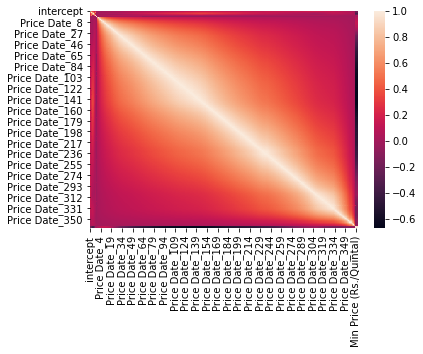

In [27]:
sns.heatmap(df.corr())

# Splitting the dataset into the Training set and Test set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Training the Random Forest Regression model on the Train dataset

In [29]:
regressor = RandomForestRegressor(n_estimators = 500, random_state = 42)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

# Predictions on Test dataset

In [30]:
y_pred=regressor.predict(X_test)
y_pred

array([1202.92, 1040.16, 1450.  ,  977.54, 1803.34, 2455.98, 1376.37,
       1177.2 , 2056.02,  977.98, 1150.08, 1291.96, 1300.71, 1861.55,
       2894.93, 1250.  , 2051.32, 1155.66, 1195.92, 1984.11, 1840.7 ,
       1199.77, 2104.9 , 1320.92, 1450.  , 1308.82, 2408.22, 1200.  ,
       1259.4 , 1382.26, 1419.96, 1181.58, 1381.92,  996.39, 1350.  ,
       1450.  , 1100.69, 1150.  , 2878.85, 1305.43, 2286.34, 1021.63,
        720.92,  840.64,  950.  ,  900.  , 1850.79,  623.86, 2503.25,
       1257.2 , 2390.94, 1929.93, 1208.51,  909.46,  950.  , 1184.03,
       1550.  ,  999.96,  899.92, 1283.18, 1242.38, 2877.59, 2904.35,
       1138.28, 1200.  ,  950.18, 1229.1 , 1400.  , 1994.07, 1300.  ,
       2501.38, 1450.  , 1200.  , 1249.98, 1200.  ,  820.08, 1978.75,
       1150.  , 1100.  , 1550.  , 2785.38, 2738.11, 1220.44, 1300.25,
       1150.  , 1297.46, 1256.29, 1312.39,  820.  , 1240.32, 2022.78,
        749.9 , 1200.04, 1200.  , 1514.98, 1050.  , 1280.4 , 1314.76,
       2707.28, 2525

# R squared Evaluation Metric

In [31]:
r2_score(y_test, y_pred)

0.9995992653333228

# root mean squared error Evaluation Metric

In [32]:
math.sqrt(mean_squared_error(y_test, y_pred))

11.321000349222851

# mean absolute error Evaluation Metric

In [33]:
mean_absolute_error(y_test, y_pred)

5.459918032786889

# Submission File

In [34]:
result=pd.DataFrame()
result=ori_df
result['Predicted Modal Price (Rs./Quintal)']=regressor.predict(X)
result.to_csv('submission.csv')
result

,Market Name,Variety,Price Date,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Predicted Modal Price (Rs./Quintal)
0,Achnera,Desi,30-Dec-20,900,1000,950,950.55
1,Achnera,Desi,29-Dec-20,800,900,850,850.00
2,Achnera,Desi,28-Dec-20,850,950,900,899.98
3,Achnera,Desi,27-Dec-20,800,900,850,850.00
4,Achnera,Desi,26-Dec-20,800,900,850,850.00
...,...,...,...,...,...,...,...
1822,Samsabad,Local,6-Jan-20,1000,1200,1100,1100.90
1823,Samsabad,Local,5-Jan-20,1000,1200,1100,1101.50
1824,Samsabad,Local,4-Jan-20,1100,1300,1200,1196.62
1825,Samsabad,Local,2-Jan-20,1100,1300,1200,1199.90
